In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_roc_curve

pd.set_option('display.max_rows',None)

In [21]:
df = pd.read_csv('SynthDataChurnQ1.csv')
df = pd.get_dummies(data = df, columns = ['size','industry'], drop_first=True)
base = df[['size_Small','industry_Manufacturing','industry_Military', 'industry_Other','industry_PublicSector']]
base.head()

,size_Small,industry_Manufacturing,industry_Military,industry_Other,industry_PublicSector
0,1,1,0,0,0
1,0,1,0,0,0
2,1,0,1,0,0
3,1,0,0,0,1
4,0,1,0,0,0


1948

In [17]:
X_train, X_test, y_train, y_test = train_test_split(base, df['tenure'], test_size=0.33)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

-0.3037370916252112 98.99357779560437


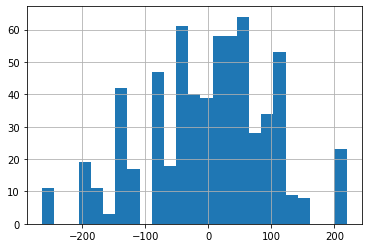

In [19]:
residuals = (prediction-y_test)
print(residuals.mean(), residuals.std())
residuals.hist(bins=25)

In [14]:
prediction = model.predict(base)

In [7]:
df1 = base.copy()
df1['Churn'] = df['Churn']
df1['Tenure'] = df['Tenure']
df1['PredictedTenure'] = prediction
df1['PredictedChurn'] = np.where( prediction > (df['Tenure'] - 31), 'Active', 'Churn')
df1.sample(10)

,size_Small,industry_Manufacturing,industry_Military,industry_Other,industry_PublicSector,Churn,Tenure,PredictedTenure,PredictedChurn
14739,0,1,0,0,0,Active,218,412.332912,Active
15399,1,1,0,0,0,Active,116,305.077853,Active
5706,1,0,0,0,1,Active,5,332.271149,Active
14373,1,0,0,0,0,Active,131,300.880942,Active
6724,1,0,0,0,1,Active,86,332.271149,Active
12396,1,0,0,0,1,Active,39,332.271149,Active
9169,0,0,0,0,1,Churn,282,439.526208,Active
4204,0,0,0,0,0,Active,78,408.136000,Active
2207,0,1,0,0,0,Active,294,412.332912,Active
12154,1,1,0,0,0,Active,204,305.077853,Active


In [8]:
df1[df1['PredictedChurn']=='Churn']

,size_Small,industry_Manufacturing,industry_Military,industry_Other,industry_PublicSector,Churn,Tenure,PredictedTenure,PredictedChurn
38,1,0,0,0,0,Churn,447,300.880942,Churn
60,1,0,0,0,1,Active,435,332.271149,Churn
90,1,1,0,0,0,Active,372,305.077853,Churn
130,1,0,0,0,1,Churn,376,332.271149,Churn
132,1,0,0,0,1,Active,423,332.271149,Churn
139,1,0,0,0,1,Active,503,332.271149,Churn
149,1,1,0,0,0,Churn,383,305.077853,Churn
169,0,0,1,0,0,Active,576,477.868305,Churn
185,1,0,0,0,1,Active,366,332.271149,Churn
191,0,1,0,0,0,Active,520,412.332912,Churn


In [9]:
print(classification_report(df1['Churn'], df1['PredictedChurn']))

              precision    recall  f1-score   support

      Active       0.91      0.96      0.94     17005
       Churn       0.39      0.21      0.27      1948

    accuracy                           0.88     18953
   macro avg       0.65      0.58      0.60     18953
weighted avg       0.86      0.88      0.87     18953

